In [1]:
%pip install seaborn
%pip install preprocessing

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

# 1 Завантажити дані, вивести назви колонок і розмір датасета

In [3]:
df = pd.read_csv("./weatherHistory.csv")

df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [4]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


# 2 Опрацювати пропуски (по можливості заповнити їх або видалити)

<AxesSubplot: >

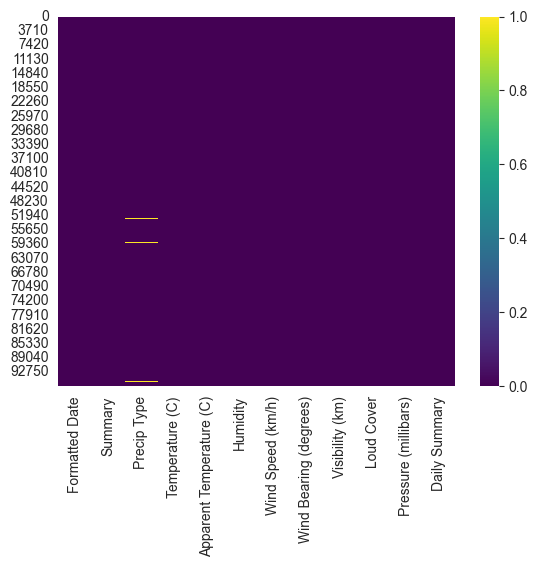

In [5]:
sns.heatmap(df.isnull(), cmap='viridis')

In [6]:
# Remove useless column

df = df.drop(columns=['Precip Type', 'Loud Cover'])
df.head()

,Formatted Date,Summary,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.


# 3 Візуалізувати дані: побудувати графік (heatmap), що відображає кореляції ознак між собою і з цільовою змінною (розміткою); побудувати гістограми розподілу ознак і boxplot-и ознак відносно цільової змінної (якщо ознак занадто багато обмежитися декількома)

/var/folders/pf/0l4vr5sx3458dlwp6hhfl46r0000gn/T/ipykernel_25009/1949841132.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


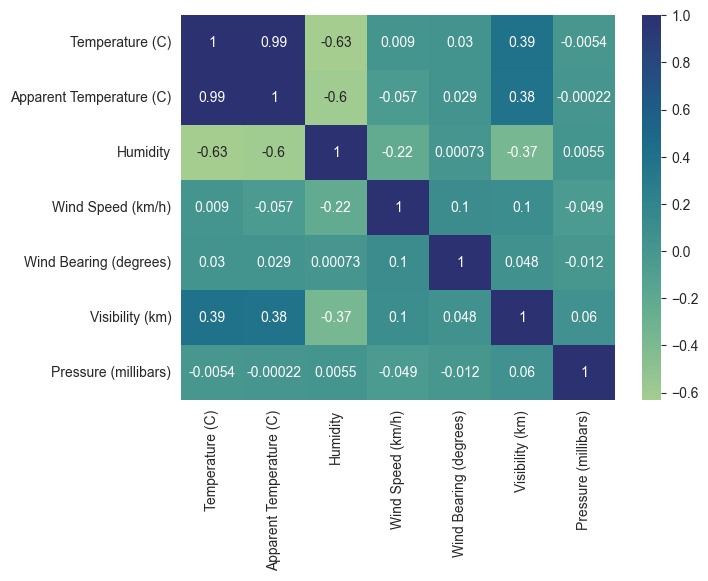

In [7]:
corr = df.corr()

fig, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(corr, cmap='crest', annot=True)

plt.show()

## Histograms

In [8]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000


<AxesSubplot: xlabel='Temperature (C)', ylabel='Count'>

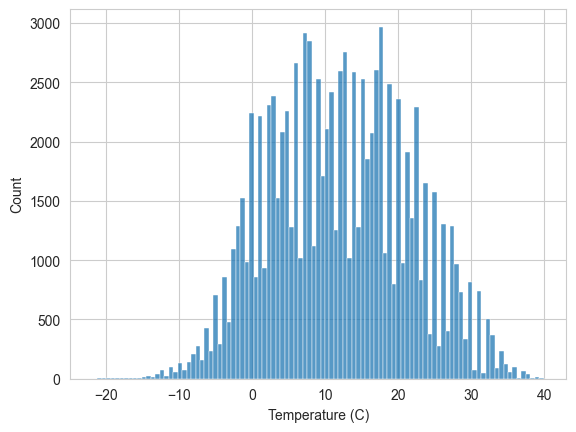

In [9]:
sns.histplot(x='Temperature (C)', data=df)

<AxesSubplot: xlabel='Wind Speed (km/h)', ylabel='Count'>

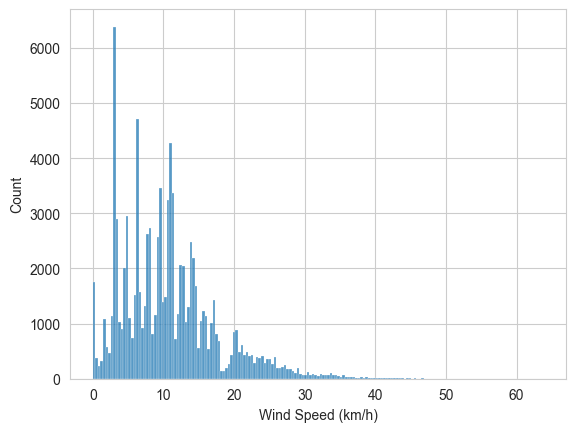

In [10]:
sns.histplot(x='Wind Speed (km/h)', data=df)

<AxesSubplot: xlabel='Visibility (km)', ylabel='Count'>

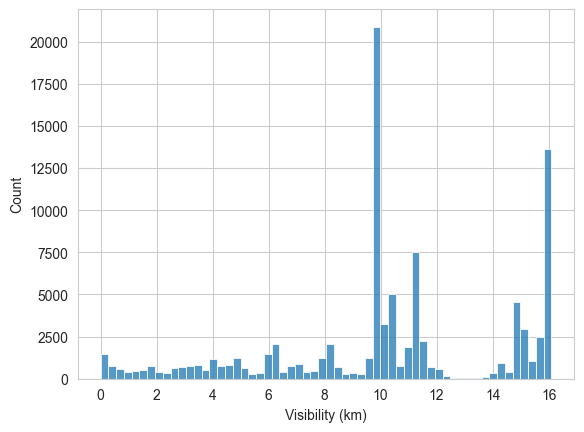

In [11]:
sns.histplot(x='Visibility (km)', data=df)

<AxesSubplot: xlabel='Visibility (km)'>

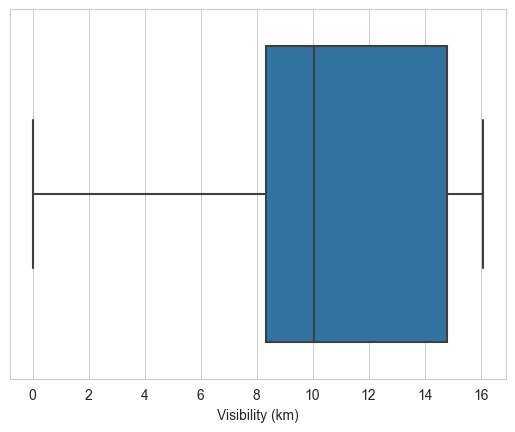

In [12]:
sns.boxplot(data=df, x="Visibility (km)")

<AxesSubplot: xlabel='Temperature (C)', ylabel='Summary'>

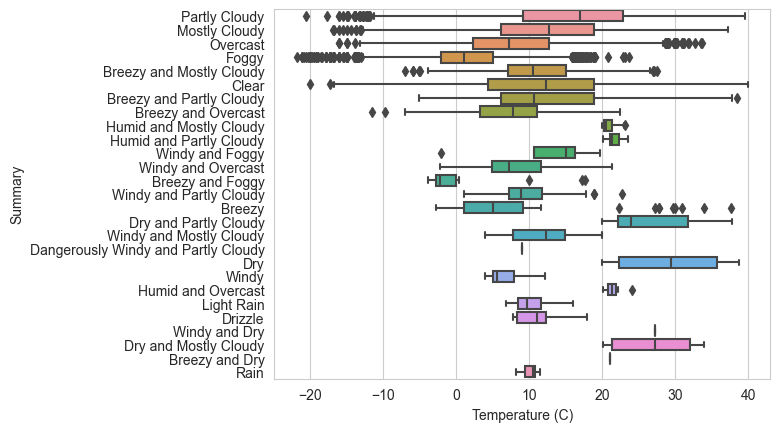

In [13]:
sns.boxplot(data=df, x="Temperature (C)", y="Summary")

<AxesSubplot: xlabel='Wind Speed (km/h)', ylabel='Summary'>

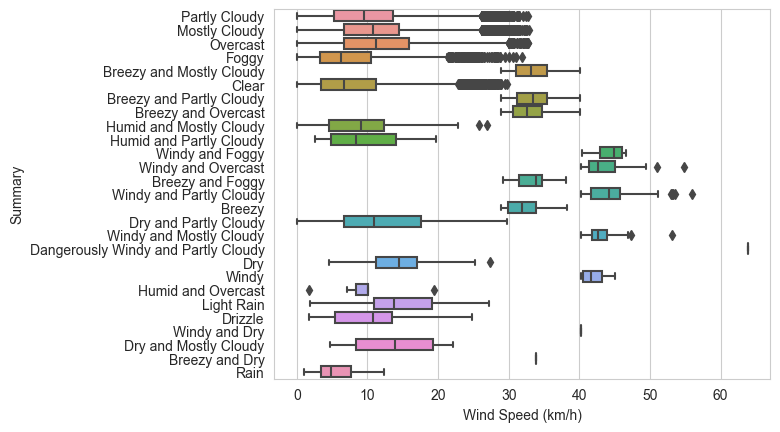

In [14]:
sns.boxplot(data=df, x="Wind Speed (km/h)", y="Summary")

# 4 Нормалізувати дані

In [15]:
df_scaled = df.copy()

to_scale = ["Temperature (C)",
            "Apparent Temperature (C)",
            "Humidity",
            "Wind Speed (km/h)",
            "Wind Bearing (degrees)",
            "Visibility (km)",
            "Pressure (millibars)"]

df_scaled[to_scale] = (df_scaled[to_scale] - df_scaled[to_scale].mean()) / df_scaled[to_scale].std()
df_scaled.head()

,Formatted Date,Summary,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,-0.257598,-0.324034,0.793466,0.478633,0.591253,1.306969,0.101685,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,-0.269812,-0.339095,0.639992,0.499591,0.665752,1.306969,0.105959,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,-0.267486,-0.138102,0.793466,-0.995468,0.153569,1.099580,0.108610,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,-0.381487,-0.459068,0.486518,0.476304,0.758877,1.306969,0.112628,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,-0.332629,-0.362467,0.486518,0.033841,0.665752,1.306969,0.113483,Partly cloudy throughout the day.


In [16]:
df_scaled = df_scaled.drop(df_scaled[df_scaled["Summary"].str.contains(pat=" and ")].index)

np.unique(df_scaled['Summary'].values)

array(['Breezy', 'Clear', 'Drizzle', 'Dry', 'Foggy', 'Light Rain',
       'Mostly Cloudy', 'Overcast', 'Partly Cloudy', 'Rain', 'Windy'],
      dtype=object)

# 5 Провести навчання наступних класифікаторів:

## kNN

In [17]:
summary_unique = np.unique(df_scaled['Summary'].values)

int_to_summary = dict(enumerate(summary_unique))
summary_to_int = {el: ind for ind, el in int_to_summary.items()}
print(summary_unique)

['Breezy' 'Clear' 'Drizzle' 'Dry' 'Foggy' 'Light Rain' 'Mostly Cloudy'
 'Overcast' 'Partly Cloudy' 'Rain' 'Windy']


In [18]:
df_scaled['Summary Int'] = df_scaled['Summary'].map(lambda x: summary_to_int[x])

df_scaled.head()

,Formatted Date,Summary,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,Summary Int
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,-0.257598,-0.324034,0.793466,0.478633,0.591253,1.306969,0.101685,Partly cloudy throughout the day.,8
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,-0.269812,-0.339095,0.639992,0.499591,0.665752,1.306969,0.105959,Partly cloudy throughout the day.,8
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,-0.267486,-0.138102,0.793466,-0.995468,0.153569,1.099580,0.108610,Partly cloudy throughout the day.,6
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,-0.381487,-0.459068,0.486518,0.476304,0.758877,1.306969,0.112628,Partly cloudy throughout the day.,8
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,-0.332629,-0.362467,0.486518,0.033841,0.665752,1.306969,0.113483,Partly cloudy throughout the day.,6


In [19]:
df_scaled = df_scaled.drop(['Formatted Date'], axis=1)
df_scaled = df_scaled.drop(['Summary'], axis=1)
df_scaled = df_scaled.drop(['Daily Summary'], axis=1)


dataset = df_scaled.drop(['Summary Int'], axis = 1)
answer = df_scaled['Summary Int']

dataset_train, dataset_test, answer_train, answer_test = train_test_split(dataset, answer, test_size=0.20)

In [20]:
kNN = KNeighborsClassifier(n_neighbors=29, weights='uniform', algorithm='auto')

kNN.fit(dataset_train, answer_train)

prediction = kNN.predict(dataset_test)
print(confusion_matrix(answer_test,prediction))

[[   0    4    0    0    0    0    1    0    2    0    0]
 [   0  417    0    0   32    0  492  182 1066    0    0]
 [   0    0    0    0    1    0    2    1    2    0    0]
 [   0    0    0    0    0    0    1    0    8    0    0]
 [   0   13    0    0 1389    0    4   44    2    0    0]
 [   0    1    0    0    0    0    3    6    1    0    0]
 [   0  170    0    0   29    0 2606  707 2089    0    0]
 [   0  102    0    0   65    0 1171 1505  526    0    0]
 [   0  278    0    0   19    0 1777  388 3826    0    0]
 [   0    0    0    0    1    0    0    0    0    0    0]
 [   0    1    0    0    0    0    0    0    0    0    0]]


In [21]:
rep_df = pd.DataFrame(
    classification_report(answer_test,prediction, digits=2, output_dict=True)
).transpose()

rep_df

/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
0,0.000000,0.000000,0.000000,7.000000
1,0.422921,0.190498,0.262677,2189.000000
2,0.000000,0.000000,0.000000,6.000000
3,0.000000,0.000000,0.000000,9.000000
4,0.904297,0.956612,0.929719,1452.000000
5,0.000000,0.000000,0.000000,11.000000
6,0.430246,0.465274,0.447075,5601.000000
7,0.531239,0.446720,0.485327,3369.000000
8,0.508641,0.608461,0.554091,6288.000000
9,0.000000,0.000000,0.000000,1.000000


## Decision Tree

In [22]:
dt = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2)
dt = dt.fit(dataset_train, answer_train)
prediction = dt.predict(dataset_test)

print(confusion_matrix(answer_test,prediction))

[[   5    0    0    0    0    0    2    0    0    0    0]
 [   0  764    0    3    0    0  475  208  739    0    0]
 [   0    0    0    0    1    0    0    3    2    0    0]
 [   0    3    0    3    0    0    1    0    2    0    0]
 [   0    2    1    0 1446    3    0    0    0    0    0]
 [   0    2    0    0    1    1    1    6    0    0    0]
 [   0  472    1    0    0    2 2362  977 1787    0    0]
 [   0  232    1    0    0    5  975 1563  593    0    0]
 [   1  755    0    4    0    3 1804  622 3097    0    2]
 [   0    0    0    0    0    0    0    0    0    1    0]
 [   0    0    0    0    0    0    0    0    0    0    1]]


In [23]:
rep_df = pd.DataFrame(
    classification_report(answer_test,prediction, digits=2, output_dict=True)
).transpose()

rep_df

,precision,recall,f1-score,support
0,0.833333,0.714286,0.769231,7.000000
1,0.342601,0.349018,0.345780,2189.000000
2,0.000000,0.000000,0.000000,6.000000
3,0.300000,0.333333,0.315789,9.000000
4,0.998619,0.995868,0.997241,1452.000000
5,0.071429,0.090909,0.080000,11.000000
6,0.420285,0.421710,0.420996,5601.000000
7,0.462563,0.463936,0.463248,3369.000000
8,0.497910,0.492525,0.495203,6288.000000
9,1.000000,1.000000,1.000000,1.000000


In [24]:
# plt.figure(figsize = (10, 10))
# plot_tree(dt,
#           feature_names = ["Temperature", "Apparent Temperature", "Humiditu", "Wind Speed", "Wind Bearing", "Visibility", "Presure"],
#           class_names = summary_unique, filled = True)
# plt.show()

# Too Big to Show

## SVM

In [25]:
svm = SVC(C=1.0, gamma = 2, kernel = 'rbf')

In [26]:
svm = svm.fit(dataset_train, answer_train)
prediction = svm.predict(dataset_test)

In [27]:
print(confusion_matrix(answer_test,prediction))

[[   5    0    0    0    0    0    1    0    1    0    0]
 [   0  299    0    0   11    0  394  184 1301    0    0]
 [   0    0    0    0    1    0    3    0    2    0    0]
 [   0    1    0    1    0    0    0    0    7    0    0]
 [   0    7    0    0 1411    2    3   21    8    0    0]
 [   0    0    0    0    0    2    3    4    2    0    0]
 [   0   70    0    0   16    0 2603  686 2226    0    0]
 [   0   51    0    0   32    0 1227 1554  505    0    0]
 [   0  134    0    0    1    0 1624  354 4175    0    0]
 [   0    0    0    0    1    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    1    0    0]]


In [28]:
rep_df = pd.DataFrame(
    classification_report(answer_test,prediction, digits=2, output_dict=True)
).transpose()

rep_df

/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
0,1.000000,0.714286,0.833333,7.000000
1,0.532028,0.136592,0.217375,2189.000000
2,0.000000,0.000000,0.000000,6.000000
3,1.000000,0.111111,0.200000,9.000000
4,0.957909,0.971763,0.964786,1452.000000
5,0.500000,0.181818,0.266667,11.000000
6,0.444350,0.464738,0.454315,5601.000000
7,0.554406,0.461264,0.503564,3369.000000
8,0.507414,0.663963,0.575227,6288.000000
9,0.000000,0.000000,0.000000,1.000000


## Random Forest

In [29]:
rfc = RandomForestClassifier(max_depth=5, n_estimators=20, criterion='gini', random_state=0)
rfc = rfc.fit(dataset_train, answer_train)
prediction = rfc.predict(dataset_test)

print(confusion_matrix(answer_test,prediction))

[[   0    0    0    0    0    0    4    3    0    0    0]
 [   0   43    0    0    8    0  533  306 1299    0    0]
 [   0    0    0    0    1    0    3    0    2    0    0]
 [   0    0    0    0    0    0    0    0    9    0    0]
 [   0    0    0    0 1450    0    0    0    2    0    0]
 [   0    0    0    0    1    0    5    4    1    0    0]
 [   0    3    0    0    1    0 2538  706 2353    0    0]
 [   0    0    0    0    0    0 1475 1416  478    0    0]
 [   0    2    0    0    2    0 1792  439 4053    0    0]
 [   0    0    0    0    1    0    0    0    0    0    0]
 [   0    0    0    0    0    0    1    0    0    0    0]]


In [30]:
rep_df = pd.DataFrame(
    classification_report(answer_test,prediction, digits=2, output_dict=True)
).transpose()

rep_df

/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
0,0.000000,0.000000,0.000000,7.000000
1,0.895833,0.019644,0.038444,2189.000000
2,0.000000,0.000000,0.000000,6.000000
3,0.000000,0.000000,0.000000,9.000000
4,0.990437,0.998623,0.994513,1452.000000
5,0.000000,0.000000,0.000000,11.000000
6,0.399622,0.453133,0.424699,5601.000000
7,0.492693,0.420303,0.453628,3369.000000
8,0.494449,0.644561,0.559613,6288.000000
9,0.000000,0.000000,0.000000,1.000000


## AdaBoost

In [31]:
abc = AdaBoostClassifier(n_estimators=30, learning_rate=1.2, random_state=0)
abc = abc.fit(dataset_train, answer_train)
prediction = abc.predict(dataset_test)

print(confusion_matrix(answer_test,prediction))

[[   0    0    0    0    0    0    0    0    7    0    0]
 [   0   50    0    0    0    0    0  149 1988    2    0]
 [   0    1    0    0    0    0    0    0    5    0    0]
 [   0    0    0    0    0    0    0    0    9    0    0]
 [   0  645    0    0    0    0    0    0    0  807    0]
 [   0    1    0    0    0    0    0    0   10    0    0]
 [   0    4    0    0    0    0    0  305 5292    0    0]
 [   0    0    0    0    0    0    0  465 2904    0    0]
 [   0    4    0    0    0    0    0  281 6003    0    0]
 [   0    0    0    0    0    0    0    0    0    1    0]
 [   0    0    0    0    0    0    0    0    1    0    0]]


In [32]:
rep_df = pd.DataFrame(
    classification_report(answer_test,prediction, digits=2, output_dict=True)
).transpose()

rep_df

/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
0,0.000000,0.000000,0.000000,7.000000
1,0.070922,0.022841,0.034554,2189.000000
2,0.000000,0.000000,0.000000,6.000000
3,0.000000,0.000000,0.000000,9.000000
4,0.000000,0.000000,0.000000,1452.000000
5,0.000000,0.000000,0.000000,11.000000
6,0.000000,0.000000,0.000000,5601.000000
7,0.387500,0.138023,0.203546,3369.000000
8,0.370121,0.954676,0.533434,6288.000000
9,0.001235,1.000000,0.002466,1.000000
